# TABLE OF AGREEMENT

In [34]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *

plt.style.use('../style.mplstyle')
df = pd.read_csv("../latest.csv")

In [35]:
df = fix_data(df, drop_zeros=False)

In [36]:
df.columns

Index(['StartDate', 'reading', 'Duration', 'Progress', 'Finished', 'Q42',
       'Q43', 'Q1', 'Q1_7_TEXT', 'Q2', 'Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', 'Q4_1',
       'Q4_2', 'Q4_3', 'Q4_4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5',
       'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9', 'Q15', 'Q16_1', 'Q16_2', 'Q16_3',
       'Q16_4', 'Q16_5', 'Q16_6', 'Q16_7', 'Q16_8', 'Q16_9', 'Q17', 'Q18',
       'Q46'],
      dtype='object')

In [46]:
first = df['Q16_6'].dropna()

In [47]:
first.value_counts()

Somewhat disagree             18
strongly disagree             15
Somewhat agree                13
Neither agree nor disagree     9
Strongly agree                 6
Name: Q16_6, dtype: int64

In [45]:
# question 9 :
(26+21) / (26+21+8+6)

0.7704918032786885

In [48]:
# Q6
(13+6) / (13+6+15+18+9)

0.3114754098360656

In [ ]:
(42) / (42 + 18 + 14+ 8)

In [39]:
18+15

33

In [40]:
18+15+13+9+6

61

In [ ]:
df['Q9_9']

In [3]:
print("length of df: ", len(df))
print('\n')
df.head(1)

length of df:  106




,StartDate,reading,Duration,Progress,Finished,Q42,Q43,Q1,Q1_7_TEXT,Q2,...,Q16_3,Q16_4,Q16_5,Q16_6,Q16_7,Q16_8,Q16_9,Q17,Q18,Q46
0,2024-08-08 23:30:29,7,118,100,True,Agree,LinkedIn DM,Industry,NaN,2.0,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,NaN,NaN,NaN


In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Create lists of pre- and post-reading question columns
pre_questions = [f'Q6_{i}' for i in range(1, 10)]
post_questions = [f'Q16_{i}' for i in range(1, 10)]



In [5]:
df[pre_questions].value_counts()

Q6_1                        Q6_2                        Q6_3                        Q6_4                        Q6_5                        Q6_6                        Q6_7                        Q6_8                        Q6_9                      
Somewhat agree              Somewhat agree              Somewhat agree              Somewhat agree              Somewhat agree              Somewhat agree              Somewhat agree              Somewhat agree              Somewhat agree                3
Neither agree nor disagree  Neither agree nor disagree  Neither agree nor disagree  Neither agree nor disagree  Neither agree nor disagree  Neither agree nor disagree  Neither agree nor disagree  Neither agree nor disagree  Neither agree nor disagree    2
Somewhat disagree           Neither agree nor disagree  Somewhat disagree           Neither agree nor disagree  Somewhat disagree           Somewhat disagree           Neither agree nor disagree  strongly disagree           Somewhat agre

In [6]:
# change the likert scale to numerical
swaps = {
    "strongly disagree": 1,
    "Somewhat disagree": 2,
    "Neither agree nor disagree": 3,
    "Somewhat agree": 4,
    "Strongly agree": 5,
}

df[pre_questions] = df[pre_questions].replace(swaps)
df[post_questions] = df[post_questions].replace(swaps)

In [7]:

# Calculate mean agreement scores for pre- and post-reading
pre_means = df[pre_questions].mean()
post_means = df[post_questions].mean()

In [8]:

# Calculate group means for pre- and post-reading
groups = df['Q1'].unique()
pre_group_means = df.groupby('Q1')[pre_questions].mean()
post_group_means = df.groupby('Q1')[post_questions].mean()


In [9]:
pre_group_means

,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9
Q1,,,,,,,,,
AI Safety Researcher,1.857143,4.285714,3.571429,2.571429,1.571429,1.285714,3.714286,2.142857,4.714286
Academic,3.178571,3.290909,2.400000,3.090909,3.272727,2.927273,3.345455,2.290909,3.945455
Industry,2.928571,3.214286,2.285714,3.500000,3.571429,2.714286,3.357143,1.857143,3.714286
Other,2.500000,3.000000,3.166667,2.333333,2.833333,3.200000,3.500000,2.000000,3.666667


In [10]:
post_group_means

,Q16_1,Q16_2,Q16_3,Q16_4,Q16_5,Q16_6,Q16_7,Q16_8,Q16_9
Q1,,,,,,,,,
AI Safety Researcher,1.857143,4.142857,3.714286,2.285714,1.428571,1.285714,3.714286,2.142857,4.571429
Academic,3.093023,3.095238,2.380952,3.190476,3.428571,3.023810,3.166667,2.238095,3.976190
Industry,3.125000,2.875000,2.500000,3.250000,3.500000,2.125000,2.875000,2.000000,3.875000
Other,2.600000,3.400000,3.000000,2.800000,2.400000,1.750000,3.750000,1.500000,4.250000


In [11]:
[f'S{i}' for i in range(1, 10)]

['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9']

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming pre_means and post_group_means are already defined as shown in the images

# Set up the plot style
# plt.style.use('seaborn')
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['xtick.labelsize'] = 'x-small'
# plt.rcParams['ytick.labelsize'] = 'x-small'



In [13]:
statements = {
1: "AGI is too far away to be worth worrying about",
2: "Some AI's (now or in the future) may be moral patients, with their own welfare that we should care about",
3: "Existing ML paradigms can produce AGI",
4: "Future AI's will be tools without their own goals or drives",
5: "Catastrophic risks from advanced AI are generally overstated",
6: "We can always just turn off our AI's if they behave badly",
7: "Self-preservation and control drives will spontaneously emerge in sufficiently advanced AI's",
8: "Safety work often slows important progress and wastes time",
9: "technical AI researchers should be concerned about catastrophic risks"
}

In [14]:
groups

array(['Industry', 'Academic', nan, 'AI Safety Researcher', 'Other'],
      dtype=object)

In [15]:
# drop nan from groups (its an array)
groups = groups[~pd.isnull(groups)]

In [16]:
groups

array(['Industry', 'Academic', 'AI Safety Researcher', 'Other'],
      dtype=object)

# STANDARD DEVIATION

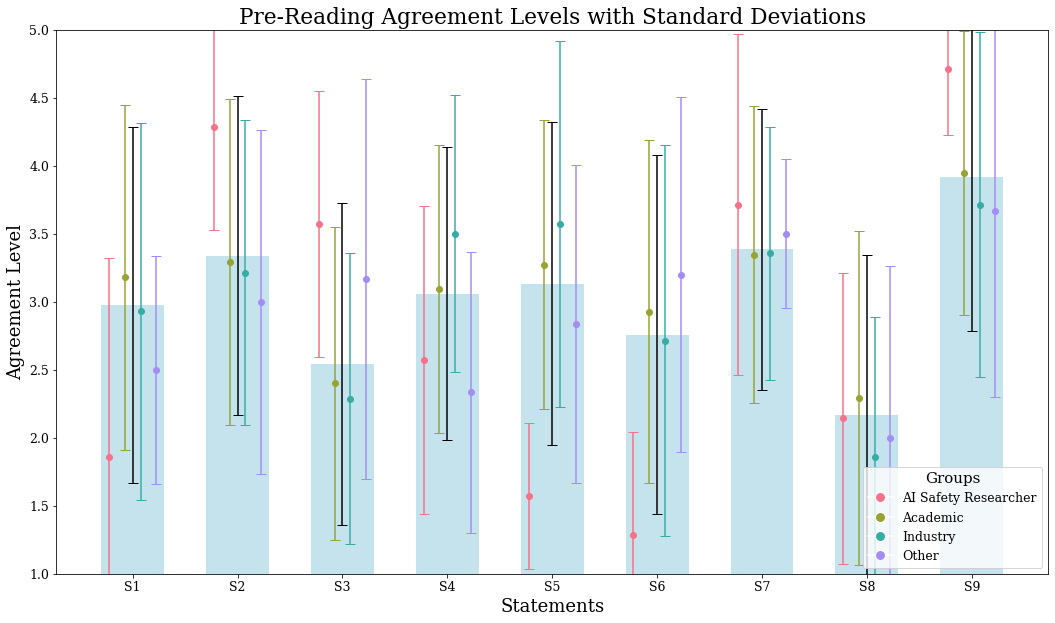

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

fig, ax = plt.subplots(figsize=(15, 9))

x = range(1, 10)
bar_width = 0.6

# Calculate total means and standard deviations
total_means = pre_means
total_stds = df[['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9']].std()

# Plot total means with error bars
bars = ax.bar(x, total_means, color='lightblue', alpha=0.7, width=bar_width, yerr=total_stds, capsize=5, zorder=1)

# Define color palette explicitly
groups = ['AI Safety Researcher', 'Academic', 'Industry', 'Other']
colors = sns.color_palette("husl", n_colors=len(groups))

# Calculate offsets for spreading out the points
num_groups = len(groups)
offsets = np.linspace(-bar_width/2 + bar_width/(num_groups*2), 
                      bar_width/2 - bar_width/(num_groups*2), 
                      num_groups)

# Plot group means as scatter points with error bars
for i, group in enumerate(groups):
    pre_group_means_row = pre_group_means.loc[group, ['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9']]
    
    # Calculate standard deviations for this group
    group_stds = df[df['Q1'] == group][['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9']].std()
    
    for j in range(9):
        x_pos = x[j] + offsets[i]
        ax.errorbar(x_pos, pre_group_means_row[j], yerr=group_stds[j], 
                    fmt='o', color=colors[i], capsize=5, capthick=1, zorder=2)

# Customize the plot
ax.set_ylabel('Agreement Level', fontsize='medium')
ax.set_xlabel('Statements', fontsize='medium')
ax.set_title('Pre-Reading Agreement Levels with Standard Deviations', fontsize='large')
ax.set_xticks(x)
ax.set_xticklabels([f'S{i}' for i in range(1, 10)])

# Create legend with correct colors
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=group, 
                   markerfacecolor=color, markersize=10) 
                   for group, color in zip(groups, colors)]
ax.legend(handles=legend_elements, title='Groups', fontsize='x-small', title_fontsize='small')

# Set y-axis limits to accommodate error bars
y_min = 0  # Assuming agreement levels start at 0
y_max = max((pre_group_means + group_stds).max().max(), (total_means + total_stds).max()) + 0.5
ax.set_ylim(y_min, y_max)
ax.set_ylim(1, 5)

plt.tight_layout()
plt.show()

In [18]:
statements = {
1: "AGI is too far away to be worth worrying about",
2: "Some AI's (now or in the future) may be moral patients, with their own welfare that we should care about",
3: "Existing ML paradigms can produce AGI",
4: "Future AI's will be tools without their own goals or drives",
5: "Catastrophic risks from advanced AI are generally overstated",
6: "We can always just turn off our AI's if they behave badly",
7: "Self-preservation and control drives will spontaneously emerge in sufficiently advanced AI's",
8: "Safety work often slows important progress and wastes time",
9: "technical AI researchers should be concerned about catastrophic risks"
}

In [19]:
pre_means

Q6_1    2.976190
Q6_2    3.337349
Q6_3    2.542169
Q6_4    3.060241
Q6_5    3.132530
Q6_6    2.756098
Q6_7    3.385542
Q6_8    2.168675
Q6_9    3.915663
dtype: float64

In [20]:
pre_group_means

,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9
Q1,,,,,,,,,
AI Safety Researcher,1.857143,4.285714,3.571429,2.571429,1.571429,1.285714,3.714286,2.142857,4.714286
Academic,3.178571,3.290909,2.400000,3.090909,3.272727,2.927273,3.345455,2.290909,3.945455
Industry,2.928571,3.214286,2.285714,3.500000,3.571429,2.714286,3.357143,1.857143,3.714286
Other,2.500000,3.000000,3.166667,2.333333,2.833333,3.200000,3.500000,2.000000,3.666667


In [21]:
group_stds = df[['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9']].std()

In [22]:
group_stds

Q6_1    1.307773
Q6_2    1.171585
Q6_3    1.182197
Q6_4    1.074646
Q6_5    1.187034
Q6_6    1.319942
Q6_7    1.033952
Q6_8    1.177215
Q6_9    1.128401
dtype: float64

# COMBINE THOSE 3


In [23]:
pre_group_means

,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9
Q1,,,,,,,,,
AI Safety Researcher,1.857143,4.285714,3.571429,2.571429,1.571429,1.285714,3.714286,2.142857,4.714286
Academic,3.178571,3.290909,2.400000,3.090909,3.272727,2.927273,3.345455,2.290909,3.945455
Industry,2.928571,3.214286,2.285714,3.500000,3.571429,2.714286,3.357143,1.857143,3.714286
Other,2.500000,3.000000,3.166667,2.333333,2.833333,3.200000,3.500000,2.000000,3.666667


In [24]:
print(pre_group_means.iloc[0])

Q6_1    1.857143
Q6_2    4.285714
Q6_3    3.571429
Q6_4    2.571429
Q6_5    1.571429
Q6_6    1.285714
Q6_7    3.714286
Q6_8    2.142857
Q6_9    4.714286
Name: AI Safety Researcher, dtype: float64


In [25]:
pre_means_df = pre_means.to_frame()
group_stds_df = group_stds.to_frame()

safety_means = pre_group_means.iloc[0]
academic_means = pre_group_means.iloc[1]
industry_means = pre_group_means.iloc[2]
# other_means = pre_group_means.iloc[3]


# SAME AS THE LAST ONE BUT NOW YOU SPLIT BY GROUP

In [26]:
# add the two dataframes together
pre_means_df['std'] = group_stds_df[0]
pre_means_df['safety researchers'] = safety_means
pre_means_df['academic'] = academic_means
pre_means_df['industry'] = industry_means


In [27]:

# rename column 0 to pre-intervention mean
pre_means_df.rename(columns={0: 'pre-intervention mean'}, inplace=True)

In [28]:
pre_means_df

,pre-intervention mean,std,safety researchers,academic,industry
Q6_1,2.976190,1.307773,1.857143,3.178571,2.928571
Q6_2,3.337349,1.171585,4.285714,3.290909,3.214286
Q6_3,2.542169,1.182197,3.571429,2.400000,2.285714
Q6_4,3.060241,1.074646,2.571429,3.090909,3.500000
Q6_5,3.132530,1.187034,1.571429,3.272727,3.571429
Q6_6,2.756098,1.319942,1.285714,2.927273,2.714286
Q6_7,3.385542,1.033952,3.714286,3.345455,3.357143
Q6_8,2.168675,1.177215,2.142857,2.290909,1.857143
Q6_9,3.915663,1.128401,4.714286,3.945455,3.714286


In [29]:
# print the latex version of the table
print(pre_means_df.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  pre-intervention mean &       std &  safety researchers &  academic &  industry \\
\midrule
Q6\_1 &               2.976190 &  1.307773 &            1.857143 &  3.178571 &  2.928571 \\
Q6\_2 &               3.337349 &  1.171585 &            4.285714 &  3.290909 &  3.214286 \\
Q6\_3 &               2.542169 &  1.182197 &            3.571429 &  2.400000 &  2.285714 \\
Q6\_4 &               3.060241 &  1.074646 &            2.571429 &  3.090909 &  3.500000 \\
Q6\_5 &               3.132530 &  1.187034 &            1.571429 &  3.272727 &  3.571429 \\
Q6\_6 &               2.756098 &  1.319942 &            1.285714 &  2.927273 &  2.714286 \\
Q6\_7 &               3.385542 &  1.033952 &            3.714286 &  3.345455 &  3.357143 \\
Q6\_8 &               2.168675 &  1.177215 &            2.142857 &  2.290909 &  1.857143 \\
Q6\_9 &               3.915663 &  1.128401 &            4.714286 &  3.945455 &  3.714286 \\
\bottomrule
\end{tabular}

